In [1]:
from halotools.empirical_models import abundance_matching
from halotools import sim_manager
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
galaxy_af = abundance_matching.LiWhite2009()
halo_af = abundance_matching.BolshoiMpeak()

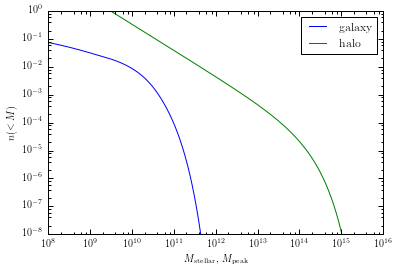

In [8]:
plt.figure()
l1, = plt.plot(galaxy_af.x_abscissa,galaxy_af.n(galaxy_af.x_abscissa))
l2, = plt.plot(halo_af.x_abscissa,halo_af.n(halo_af.x_abscissa))
plt.legend((l1,l2),('galaxy','halo'))
plt.xscale('log')
plt.yscale('log')
plt.ylim([10**(-8),1])
plt.xlabel(r'$M_{\rm stellar}$, $M_{\rm peak}$')
plt.ylabel(r'$n(<M)$')
plt.show()

In [14]:
mstar = np.logspace(9,12,1000)
mpeak = np.logspace(9,16,1000)
params = {'galprop_name':'mstar',
          'prim_haloprop_key':'halo_mpeak',
          'galaxy_abundance_function':galaxy_af,
          'halo_abundance_function':halo_af,
          'galprop_sample_values':mstar,
          'haloprop_sample_values':mpeak,
          'scatter':0.0
          }
result = abundance_matching.AbundanceMatching(**params)

In [24]:
#load halo catalogue
halocat = sim_manager.CachedHaloCatalog('Bolshoi',z=0.0) 
halo_table = halocat.halo_table

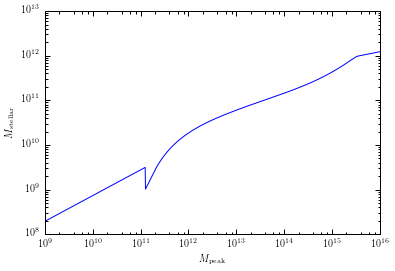

In [33]:
plt.figure()
plt.plot(mpeak,result.mean_mstar(prim_haloprop=mpeak))
plt.xlabel(r'$M_{\rm peak}$')
plt.ylabel(r'$M_{\rm stellar}$')
plt.xscale('log')
plt.yscale('log')
plt.show()